In [14]:
import numpy as np
import pandas as pd
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import os
import cv2

from torch.utils.data import Dataset, DataLoader
from torchvision import transforms, utils
from torch import optim as optim
import torch.nn.functional as F
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from torchvision.transforms import ToTensor
import cv2
import numpy as np
import dlib
from imutils import face_utils

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
 
    
import torchvision.transforms as transforms

label_names = ['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
one_hot_template = torch.zeros(len(label_names), len(label_names))

for i in range(0, len(label_names)):
    one_hot_template[i][i] = 1

class FacialImages(Dataset):
    def __init__(self, directory, label_directory_names, to_coords=True):
        loader = os.listdir(str(directory))
        labels = label_directory_names
        self.dataset = []
        final_labelled_directories = []
        self.transform = transforms.Compose([transforms.ToTensor()])
        loader.remove(loader[1])
        
        for counter, i in enumerate(loader):
            final_labelled_directories.append([directory + '/' + i, i])
        
        for i, g in final_labelled_directories:
            label_loader = os.listdir(i)
            for x in label_loader:
                if x == '.ipynb_checkpoints': #cunt boi never broke again
                    continue
                
                with Image.open(i +'/' + x) as image:
                    trs_image = self.transform(image.resize((256, 256)))
                    if to_coords == True:
                        trs_image = torch.FloatTensor(pixels_to_coords(str(i +'/' + x)))
                    self.dataset.append([trs_image, label_encoder_dict[g], str(i +'/' + x)])
    
    def __len__(self):
        return(len(self.dataset))
    
    def __getitem__(self, index):
        image = self.dataset[index][0]
        label = self.dataset[index][1]
        directory = self.dataset[index][2]
        
        return [image, label, directory]
        
        
    def image_view(self, index):
        array = self.dataset[index][0].view(256, -1)
        return plt.imshow(array.numpy(), cmap='gray'), array
    
def pixels_to_coords(train_data_item):
    img = cv2.resize(cv2.imread(train_data_item, 0), (256, 256))
    rects = detector(img, 0)
    landmarks = list()
    for (i, rect) in enumerate(rects):
        shape = predictor(img, rect)
        shape = face_utils.shape_to_np(shape)
        image_coords = list()
        for (x, y) in shape:
            image_coords.append([x, y])
            landmarks.append(image_coords)
    return landmarks

In [15]:
train_data = FacialImages('/Users/devpatelio/Downloads/Coding/Python/pyTorch/conversation_mood/image_mood/ferdata/train', label_names, to_coords=True)
test_data = FacialImages('/Users/devpatelio/Downloads/Coding/Python/pyTorch/conversation_mood/image_mood/ferdata/test', label_names, to_coords=True)

In [38]:
train_data_face = FacialImages('/Users/devpatelio/Downloads/Coding/Python/pyTorch/conversation_mood/image_mood/ferdata/train', label_names, to_coords=False)
test_data_face = FacialImages('/Users/devpatelio/Downloads/Coding/Python/pyTorch/conversation_mood/image_mood/ferdata/test', label_names, to_coords=False)

In [24]:

label_encoder_dict = {label_names[i]: one_hot_template[i] for i in range(0, len(label_names))}
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("/Users/devpatelio/Downloads/Coding/Python/pyTorch/conversation_mood/image_mood/shape_predictor_68_face_landmarks.dat")
landmarks = []

for x in range(0, 2):
    img = cv2.resize(cv2.imread(train_data[x][2], 0), (256, 256))
    rects = detector(img, 0)
    for (i, rect) in enumerate(rects):
        shape = predictor(img, rect)
        shape = face_utils.shape_to_np(shape)
        image_coords = list()
        for (x, y) in shape:
            image_coords.append([x, y])
        landmarks.append(image_coords)


In [26]:
print(landmarks[0])

[[5, 115], [13, 146], [27, 175], [41, 202], [56, 227], [78, 246], [107, 257], [140, 262], [174, 260], [204, 256], [228, 243], [245, 222], [253, 193], [256, 160], [257, 127], [259, 95], [256, 62], [12, 93], [23, 78], [42, 72], [64, 72], [86, 76], [149, 66], [169, 52], [191, 43], [215, 38], [237, 44], [124, 95], [129, 122], [134, 149], [139, 175], [117, 186], [131, 188], [146, 190], [158, 182], [170, 175], [42, 108], [54, 96], [72, 94], [87, 105], [73, 110], [55, 113], [166, 90], [179, 72], [198, 66], [215, 72], [204, 82], [185, 88], [99, 217], [117, 215], [135, 210], [150, 211], [164, 203], [186, 198], [208, 193], [195, 212], [177, 224], [161, 229], [145, 230], [122, 229], [105, 219], [137, 219], [153, 218], [168, 212], [203, 197], [171, 211], [156, 216], [140, 217]]


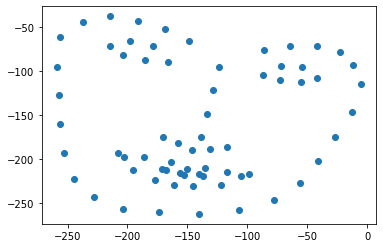

(<matplotlib.image.AxesImage at 0x7fd7523a3070>,
 tensor([[0.4314, 0.4275, 0.4196,  ..., 0.3686, 0.3765, 0.3882],
         [0.4314, 0.4275, 0.4196,  ..., 0.3647, 0.3725, 0.3804],
         [0.4353, 0.4314, 0.4235,  ..., 0.3529, 0.3608, 0.3686],
         ...,
         [0.0275, 0.0275, 0.0275,  ..., 0.4784, 0.4784, 0.4784],
         [0.0275, 0.0275, 0.0275,  ..., 0.4784, 0.4784, 0.4784],
         [0.0275, 0.0275, 0.0275,  ..., 0.4784, 0.4784, 0.4784]]))

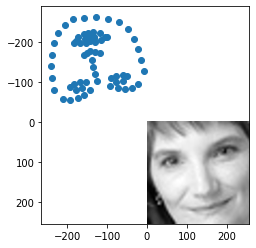

(<matplotlib.image.AxesImage at 0x7fd752433be0>,
 tensor([[0.4314, 0.4275, 0.4196,  ..., 0.3686, 0.3765, 0.3882],
         [0.4314, 0.4275, 0.4196,  ..., 0.3647, 0.3725, 0.3804],
         [0.4353, 0.4314, 0.4235,  ..., 0.3529, 0.3608, 0.3686],
         ...,
         [0.0275, 0.0275, 0.0275,  ..., 0.4784, 0.4784, 0.4784],
         [0.0275, 0.0275, 0.0275,  ..., 0.4784, 0.4784, 0.4784],
         [0.0275, 0.0275, 0.0275,  ..., 0.4784, 0.4784, 0.4784]]))

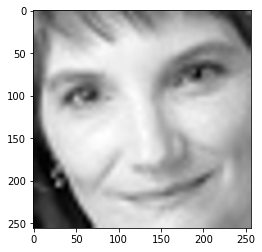

In [42]:
for i in landmarks:
    x_landmarks = []
    y_landmarks = []
    for x in i:
            x_landmarks.append(-int(x[0]))
            y_landmarks.append(-int(x[1]))
    plt.scatter(x_landmarks, y_landmarks)
    plt.show()
    train_data_face.image_view(0)



In [629]:
# print(train_data[0][0][:68])
# print(train_data[0][0][68:136])
# print(train_data[0][0][136:204])
# print(train_data[0][0][204:272])

for i in train_data:
    for x in i[0]:
        x = x - i[0].min()
        x /= i[0].max()

In [37]:
batch_size = 10
num_epochs = 50

trainloader = torch.utils.data.DataLoader(train_data, batch_size=batch_size, shuffle=True)
testloader = torch.utils.data.DataLoader(test_data, batch_size=batch_size, shuffle=False)

dataiter = iter(trainloader)
data = dataiter.next()
keys = list(label_encoder_dict.keys())
values = list(label_encoder_dict.values())

RuntimeError: stack expects each tensor to be equal size, but got [68, 68, 2] at entry 0 and [0] at entry 3

In [684]:
class Emotion_CNN(nn.Module):
    def __init__ (self):
        super(Emotion_CNN, self).__init__()
        #layer 1
        self.conv1 = nn.Conv2d(1, 128, kernel_size=2, stride=2) #in, out, kernel, stride
        self.conv1b = nn.BatchNorm2d(128) #output of previous step
        self.pool1 = nn.MaxPool2d(2, 2, padding=1) #kernel, stride
        self.dropout = nn.Dropout(0) #0-1 value 
        
        #layer 2
        self.conv2 = nn.Conv2d(128, 64, kernel_size=2, stride=1) #in, out, kernel, stride
        self.conv2b = nn.BatchNorm2d(64) #output of previous step
        self.pool2 = nn.MaxPool2d(2, 2, padding=1) #kernel, stride
        self.dropout = nn.Dropout(0) #0-1 value 
        
        #layer 3
        self.conv3 = nn.Conv2d(64, 32, kernel_size=4, stride=1) #in, out, kernel, stride
        self.conv3b = nn.BatchNorm2d(32) #output of previous step
        self.pool3 = nn.MaxPool2d(2, 2, padding=1) #kernel, stride
        self.dropout = nn.Dropout(0) #0-1 value 
        
        #layer 4
        self.conv4 = nn.Conv2d(32, 16, kernel_size=4, stride=1) #in, out, kernel, stride
        self.conv4b = nn.BatchNorm2d(16) #output of previous step
        self.pool4 = nn.MaxPool2d(2, 2, padding=1) #kernel, stride
        self.dropout = nn.Dropout(0) #0-1 value 
        
        #layer 5
        self.conv5 = nn.Conv2d(16, 8, kernel_size=4, stride=1) #in, out, kernel, stride
        self.conv5b = nn.BatchNorm2d(8) #output of previous step
        self.pool5 = nn.MaxPool2d(2, 2, padding=1) #kernel, stride
        self.dropout = nn.Dropout(0) #0-1 value 

        ##fully connected
        self.fc1 = nn.Linear(in_features= 8 * 3 * 3, out_features=120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 700)
        self.fc3 = nn.Linear(in_features = 700, out_features = 100)
        self.fc4 = nn.Linear(in_features = 100, out_features = 7)
        
        self.soft = nn.Softmax(dim=1)
    
        
    def forward(self, x):
        print(x.shape)
        x = self.pool1(F.relu(self.dropout(self.conv1b(self.conv1(x)))))
        print(x.shape)
        x = self.pool2(F.relu(self.dropout(self.conv2b(self.conv2(x)))))
        print(x.shape)
        x = self.pool3(F.relu(self.dropout(self.conv3b(self.conv3(x)))))
        print(x.shape)
        x = self.pool4(F.relu(self.dropout(self.conv4b(self.conv4(x)))))
        print(x.shape)
        x = self.pool5(F.relu(self.dropout(self.conv5b(self.conv5(x)))))
        print(x.shape)
        x = x.view(10, -1)
        print(x.shape)
        x = F.relu(self.fc1(x))
        print(x.shape)
        x = F.relu(self.fc2(x))
#         print(x.shape)
        x = F.relu(self.fc3(x))
#         print(x.shape)
        x = self.fc4(x)
#         print(x.shape)
        x = self.soft(x)
#         print(x.shape)
        return x
        
cnn = Emotion_CNN()

In [685]:
class FeedForward(nn.Module): 
    def __init__(self):
        super(FeedForward, self).__init__() 
        self.fc1 = nn.Linear(68*2, 300)
        self.fc2 = nn.Linear(300, 700)
        self.fc3 = nn.Linear(700, 500)
        self.fc4 = nn.Linear(500, 300)
        self.fc5 = nn.Linear(300, 200)
        self.fc6 = nn.Linear(200, 100)
        self.output = nn.Linear(100, 7)
        self.softmax = nn.Softmax(dim=1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = F.relu(self.fc5(x))
        x = F.relu(self.fc6(x))
        x = self.output(x)
        x = self.softmax(x)
        return x

In [686]:
from torch.optim import Adam, SGD
optimizer = Adam(cnn.parameters(), lr=1e-2)
criterion = nn.CrossEntropyLoss()
print(cnn)

Emotion_CNN(
  (conv1): Conv2d(1, 128, kernel_size=(2, 2), stride=(2, 2))
  (conv1b): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0, inplace=False)
  (conv2): Conv2d(128, 64, kernel_size=(2, 2), stride=(1, 1))
  (conv2b): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 32, kernel_size=(4, 4), stride=(1, 1))
  (conv3b): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool3): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_mode=False)
  (conv4): Conv2d(32, 16, kernel_size=(4, 4), stride=(1, 1))
  (conv4b): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool4): MaxPool2d(kernel_size=2, stride=2, padding=1, dilation=1, ceil_

In [36]:
train_losses = []
for epoch in range(0, 20):
    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        inputs = data[0]
        labels = data[1]
        inputs = inputs.view(10, 1, 256, 256)
        optimizer.zero_grad()
        outputs = cnn(inputs)
        labels = torch.squeeze(labels)
        labels = labels.type(torch.LongTensor)
#         print('Output', outputs.shape)
#         print('Input', inputs.shape)
#         print('Label', labels.shape)
#         print(torch.max(labels, 1)[1]) #we're using the index of the max value in each label
#         print(labels)
        loss = criterion(outputs, torch.max(labels, 1)[1])
        train_losses.append(loss)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
        print(f"Epoch: {epoch} Training loss: {loss}")  

    print(f"Epoch: {epoch} Training loss: {running_loss}")  


print('Finished Training')

plt.plot(train_losses)
plt.show()

NameError: name 'trainloader' is not defined